# Table6. Canal closure and rebellions: placebo treatments

In [1]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1/Program


In [2]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1


In [3]:
adopath ++ "/Users/chengjun/Library/Application Support/Stata/ado/plus/"


  [1]              "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [2]  (BASE)      "/Applications/Stata/ado/base/"
  [3]  (SITE)      "/Applications/Stata/ado/site/"
  [4]              "."
  [5]  (PERSONAL)  "/Users/chengjun/Documents/Stata/ado/personal/"
  [6]  (PLUS)      "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [7]  (OLDPLACE)  "~/ado/"
  [8]              "/opt/anaconda3/lib/python3.8/site-packages/stata_kernel/ado"


In [4]:
**************************************************************************
*** Set up
**************************************************************************
use "Data/Final/rebellion.dta", clear
run "Program/Analysis/generalsetup.do"



In [5]:
**************************************************************************
*** Table6. Canal closure and rebellions: placebo treatments
**************************************************************************
gen oldhuang_after=along_oldhuang*reform
gen coast_after=alongcoast*reform
gen courier_after=alongcourier*reform
egen plcb=rowmax(alongyangtze along_oldhuang alongcoast alongcourier)
gen plcb_after=plcb*reform
label variable yangtze_after "Along Yangtze $ \times $ Post"
label variable oldhuang_after "Along Huang $ \times $ Post"
label variable coast_after "Along Coast $ \times $ Post"
label variable courier_after "Along Courier $ \times $ Post"
label variable plcb_after "Along $ \times $ Post"
global Xp1 yangtze_after
global Xp2 oldhuang_after
global Xp3 coast_after
global Xp4 courier_after
global Xp_any plcb_after

In [6]:
*** Main estimates
reghdfe $Y $Xp1, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) cluster(OBJECTID)
eststo est1
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est1
estadd scalar N_g=groups:est1

reghdfe $Y $Xp2, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) cluster(OBJECTID)
eststo est2
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est2
estadd scalar N_g=groups:est2

reghdfe $Y $Xp3, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) cluster(OBJECTID)
eststo est3
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est3
estadd scalar N_g=groups:est3

reghdfe $Y $Xp4, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) cluster(OBJECTID)
eststo est4
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est4
estadd scalar N_g=groups:est4

reghdfe $Y $Xp_any, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) cluster(OBJECTID)
eststo est5
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est5
estadd scalar N_g=groups:est5


(MWFE estimator converged in 7 iterations)

HDFE Linear regression                            Number of obs   =    140,432
Absorbing 5 HDFE groups                           F(   1,    535) =      12.19
Statistics robust to heteroskedasticity           Prob > F        =     0.0005
                                                  R-squared       =     0.0661
                                                  Adj R-squared   =     0.0496
                                                  Within R-sq.    =     0.0001
Number of clusters (OBJECTID) =        536        Root MSE        =     0.3800

                              (Std. err. adjusted for 536 clusters in OBJECTID)
-------------------------------------------------------------------------------
              |               Robust
ashonset_c~00 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
yangtze_after |  -.0496088   .0142107    -3.


                             (Std. err. adjusted for 536 clusters in OBJECTID)
------------------------------------------------------------------------------
             |               Robust
ash~ypop1600 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
  plcb_after |   .0033839   .0092068     0.37   0.713    -.0147021    .0214699
       _cons |   .0324702   .0013814    23.51   0.000     .0297566    .0351838
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-------------------------------------------------------------+
         Absorbed FE | Categories  - Redundant  = Num. Coefs |
---------------------+---------------------------------------|
            OBJECTID |       536         536           0    *|
                year |       262           1         261     |
 year#c.ashprerebels |       262           0         262    ?|
  

In [7]:
*** Get indicators of FEs
estfe est1 est2 est3 est4 est5

In [8]:
*** Get Conley standard errors
preserve
hdfe $Y $Xp1, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $Xp1, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V))
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est1 
restore
preserve
hdfe $Y $Xp2, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $Xp2 , lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V)) 
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est2
restore
preserve
hdfe $Y $Xp3, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $Xp3, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V))
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est3 
restore
preserve
hdfe $Y $Xp4, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $Xp4, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V)) 
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est4
restore
preserve
hdfe $Y $Xp_any, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $Xp_any, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V))
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est5 
restore



(cachevars: year OBJECTID)
(converged in 5 iterations)

 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  yangtze_after
 
SPATIAL CORRELATION KERNAL CUTOFF: 500 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
-------------------------------------------------------------------------------
ashonset~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
yangtze_after |  -.0496725   .0209383    -2.37   0.018    -.0907112   -.0086339
-------------------------------------------------------------------------------
 
STANDARD ERRORS UNDER OLS, WITH SPATIAL CORRECTION AND WITH SPATIAL AND SERIAL C
> ORRECTION:

-----------------------------------------------
    Variable |   OLS      spatial    spatHAC   
-------------+---------------------------------
yangtze_

             |    0.005      0.007      0.009  
             |    0.710      0.470      0.388  
-------------+---------------------------------
           N |   140432     140432     140432  
          r2 |    0.000      0.000      0.000  
-----------------------------------------------
                                 Legend: b/se/t
 
STANDARD ERRORS UNDER OLS, WITH SPATIAL CORRECTION AND WITH SPATIAL AND SERIAL C
> ORRECTION:

-----------------------------------------------------
    Variable |    OLS        spatial      spatHAC    
-------------+---------------------------------------
  plcb_after |   0.003        0.003        0.003     
-----------------------------------------------------
                  Legend: * p<.1; ** p<.05; *** p<.01






In [9]:
**************************************************************************
*** Set up table elements for Latex
**************************************************************************

*** Title
global caption "Canal closure and rebellions: placebo treatments"

*** Table head
#delimit ;
global head
    \begin{table}[htb]\centering
    \caption{$caption } \begin{adjustbox}{max width=\textwidth} \begin{threeparttable}
	\begin{tabular}{l*{5}{c}}
	\toprule\toprule
	&\multicolumn{5}{c}{Dependent Variable: Rebellions } \\
	[.1cm]\cmidrule(lr){2-6}
    \textit{Placebo treatment:} & (A) & (B) & (C) & (D) & (E) \\ 
    [.1cm]\cmidrule(lr){2-2}\cmidrule(lr){3-3}\cmidrule(lr){4-4}\cmidrule(lr){5-5}\cmidrule(lr){6-6}
	;
#delimit cr
*** Table notes
run "Program/Analysis/generalnotes.do"
global note_along "$ Along $ is an indicator that equals one if the county is adjacent to the specific transportion arterial specified at the top of each column: (A) Yangtze River, (B) Yellow River, (C) Coast, (D) Courier routes, and (E) Any of the four. "
global notes "\begin{tablenotes}\footnotesize{\item \textit{Note.} $note_sample $note_dep $note_along $note_post $note_std $note_conley }\end{tablenotes}"

In [10]:
**************************************************************************
*** Export Table to Latex
**************************************************************************
esttab est1 est2 est3 est4 est5 ///
	   using "Results/Tables/table6.tex", booktabs nonotes compress label nomtitles ///
                                   cells(b(fmt(4)) se(fmt(4) par(( ))) sesp(fmt(4) par([ ]) drop(_cons))) ///
							       collabels("",none) ///
                                   rename(yangtze_after plcb_after oldhuang_after plcb_after coast_after plcb_after courier_after plcb_after) ///
                                   stats(depavg N N_g r2_a,fmt(4 %7.0fc 0 4) labels("Mean of the Dependent Variable" "No. of Observations" "No. of Counties" "Adjusted R-squared")) ///
								   indicate("County FE =0.OBJECTID" "Year FE=0.year" "Pre-reform rebellion $\times$ Year FE=0.year#c.ashprerebels" "Province $\times$ Year FE=0.provid#0.year"  "Prefecture Year Trend=0.prefid#c.year") ///
    							   prehead($head ) ///
                                   postfoot(\bottomrule\end{tabular}$notes\end{threeparttable}\end{adjustbox}\end{table}) ///
                                   $stars ///
                                   replace


(file Results/Tables/table6.tex not found)
(output written to Results/Tables/table6.tex)


In [11]:
**************************************************************************
*** Export Table to Latex
**************************************************************************
esttab est1 est2 est3 est4 est5, ///
   cells(b(fmt(4)) se(fmt(4) par(( ))) sesp(fmt(4) par([ ]) drop(_cons))) ///
   collabels("",none) ///
   rename(yangtze_after plcb_after oldhuang_after plcb_after coast_after plcb_after courier_after plcb_after) ///
   stats(depavg N N_g r2_a,fmt(4 %7.0fc 0 4) labels("Mean of the Dependent Variable" "No. of Observations" "No. of Counties" "Adjusted R-squared")) ///
   indicate("County FE =0.OBJECTID" "Year FE=0.year" "Pre-reform rebellion $\times$ Year FE=0.year#c.ashprerebels" "Province $\times$ Year FE=0.provid#0.year"  "Prefecture Year Trend=0.prefid#c.year") ///
   prehead($head ) ///
   postfoot(\bottomrule\end{tabular}$notes\end{threeparttable}\end{adjustbox}\end{table}) ///
   $stars ///
   replace



\begin{table}[htb]\centering     \caption{Canal closure and rebellions: placebo 
> treatments } \begin{adjustbox}{max width=\textwidth} \begin{threeparttable}  \
> begin{tabular}{l*{5}{c}}  \toprule\toprule  &\multicolumn{5}{c}{Dependent Vari
> able: Rebellions } \\  [.1cm]\cmidrule(lr){2-6}     \textit{Placebo treatment:
> } & (A) & (B) & (C) & (D) & (E) \\      [.1cm]\cmidrule(lr){2-2}\cmidrule(lr){
> 3-3}\cmidrule(lr){4-4}\cmidrule(lr){5-5}\cmidrule(lr){6-6} 
                      (1)          (2)          (3)          (4)          (5)
             ash~ypop1600 ash~ypop1600 ash~ypop1600 ash~ypop1600 ash~ypop1600
-----------------------------------------------------------------------------
plcb_after        -0.0496       0.0484       0.0044      -0.0045       0.0034
                 (0.0142)     (0.0308)     (0.0102)     (0.0094)     (0.0092)
                 [0.0209]     [0.0264]     [0.0118]     [0.0096]     [0.0090]
_cons              0.0335       0.0319       0.0328       0.033

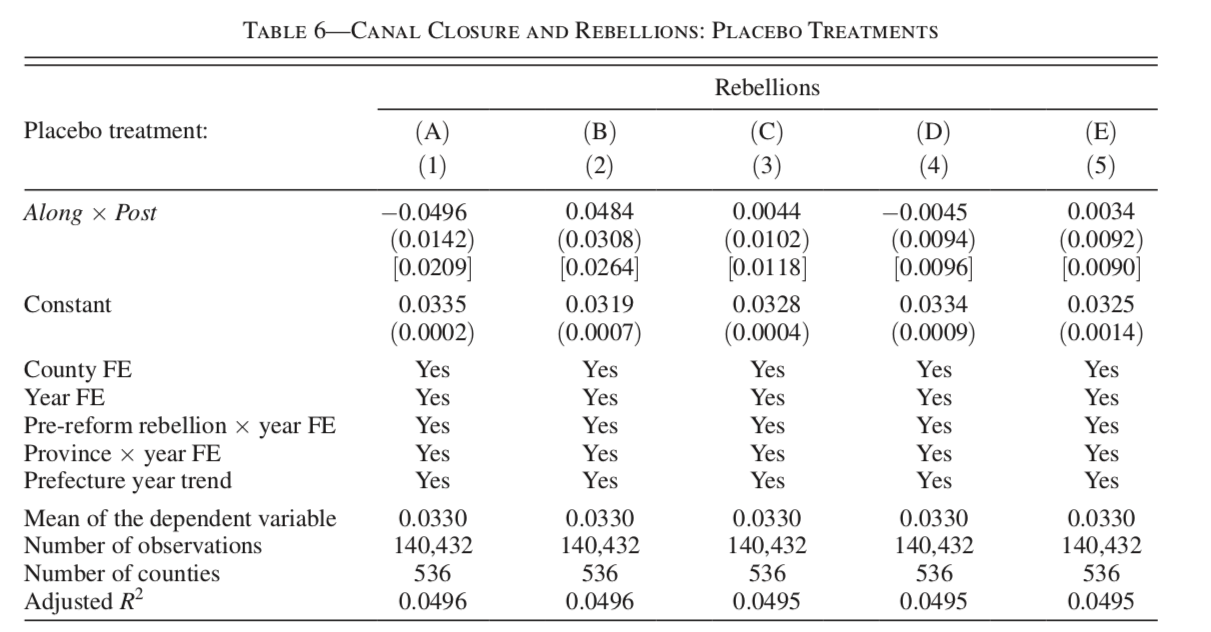